In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset into a pandas DataFrame
data = pd.read_csv('balanced_migraine_data.csv')


df = pd.DataFrame(data)

# Encode the target variable
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

# Separate features and target
X = df.drop(columns=['Type'])
y = df['Type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1349, 23), (338, 23), (1349,), (338,))

In [3]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Adjusted to the number of unique classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100
68/68 [==============================] - 3s 11ms/step - loss: 1.8992 - accuracy: 0.2502 - val_loss: 1.6771 - val_accuracy: 0.4593
Epoch 2/100
68/68 [==============================] - 0s 5ms/step - loss: 1.6449 - accuracy: 0.3698 - val_loss: 1.3895 - val_accuracy: 0.5889
Epoch 3/100
68/68 [==============================] - 0s 5ms/step - loss: 1.4220 - accuracy: 0.4745 - val_loss: 1.1253 - val_accuracy: 0.6370
Epoch 4/100
68/68 [==============================] - 0s 5ms/step - loss: 1.2070 - accuracy: 0.5663 - val_loss: 0.9093 - val_accuracy: 0.7593
Epoch 5/100
68/68 [==============================] - 0s 5ms/step - loss: 1.0974 - accuracy: 0.6154 - val_loss: 0.7539 - val_accuracy: 0.8000
Epoch 6/100
68/68 [==============================] - 0s 5ms/step - loss: 0.9967 - accuracy: 0.6191 - val_loss: 0.6712 - val_accuracy: 0.8222
Epoch 7/100
68/68 [==============================] - 0s 5ms/step - loss: 0.9534 - accuracy: 0.6617 - val_loss: 0.5905 - val_accuracy: 0.8444
Epoch 8/100


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


11/11 [==============================] - 0s 2ms/step
Accuracy: 91.72%
Confusion Matrix:
[[47  6  2  0  1  1  0]
 [ 0 48  0  0  0  1  0]
 [ 0  0 50  0  0  0  0]
 [ 0  0  1 48  0  2  0]
 [ 1  0  0  0 35  2  0]
 [ 3  2  0  0  6 34  0]
 [ 0  0  0  0  0  0 48]]


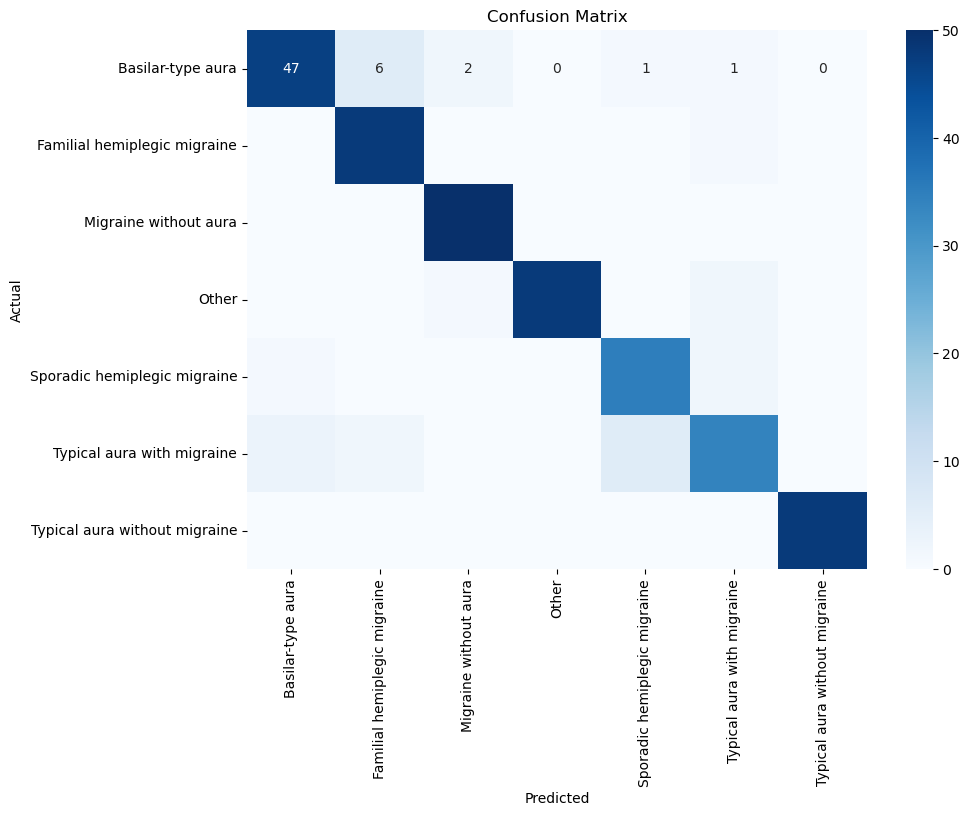

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


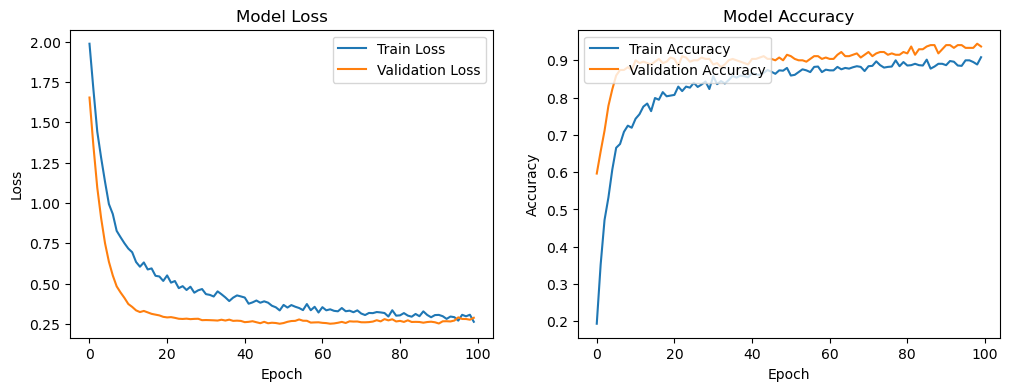

In [5]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.show()


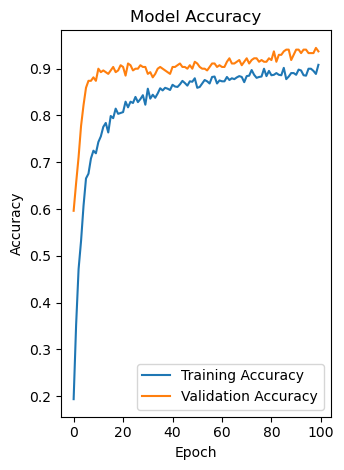

In [6]:

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()